In [65]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [66]:
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

In [67]:
train_set = train.flow_from_directory(r'/content/drive/MyDrive/Data/dataset_mnist/train',
                                  target_size=(224,224),
                                  class_mode='categorical')

test_set = test.flow_from_directory(r'/content/drive/MyDrive/Data/dataset_mnist/test',
                                  target_size=(224,224),
                                  class_mode='categorical')

Found 1000 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [68]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [69]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 186624)            0         
                                                                 
 dense_19 (Dense)            (None, 128)              

In [70]:
opt = Adam(learning_rate=0.00001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [71]:
history = model.fit(train_set, epochs=15, validation_data=test_set)

Epoch 1/15
32/32 [==============================] - 4s 87ms/step - loss: 1.9820 - accuracy: 0.4930 - val_loss: 1.5642 - val_accuracy: 0.7700
Epoch 2/15
32/32 [==============================] - 3s 80ms/step - loss: 1.2787 - accuracy: 0.8100 - val_loss: 1.0072 - val_accuracy: 0.8300
Epoch 3/15
32/32 [==============================] - 3s 98ms/step - loss: 0.8419 - accuracy: 0.8510 - val_loss: 0.6917 - val_accuracy: 0.8600
Epoch 4/15
32/32 [==============================] - 3s 86ms/step - loss: 0.6049 - accuracy: 0.8830 - val_loss: 0.5402 - val_accuracy: 0.8500
Epoch 5/15
32/32 [==============================] - 3s 79ms/step - loss: 0.4742 - accuracy: 0.9030 - val_loss: 0.4563 - val_accuracy: 0.8800
Epoch 6/15
32/32 [==============================] - 3s 81ms/step - loss: 0.3941 - accuracy: 0.9130 - val_loss: 0.4487 - val_accuracy: 0.8600
Epoch 7/15
32/32 [==============================] - 3s 101ms/step - loss: 0.3420 - accuracy: 0.9280 - val_loss: 0.3985 - val_accuracy: 0.8800
Epoch 8/15
3

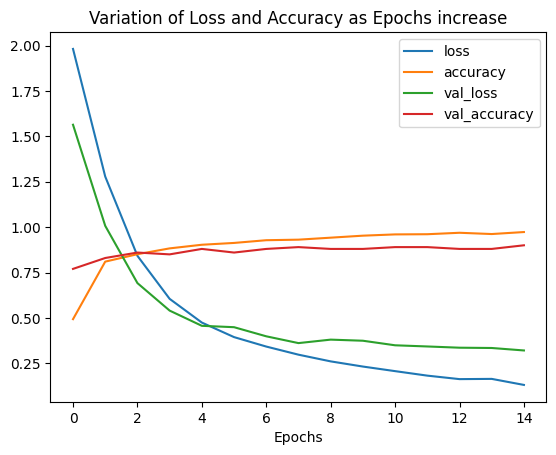

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.xlabel("Epochs")
plt.title("Variation of Loss and Accuracy as Epochs increase")
plt.show()